# Out of Vocabulary(OOV) (词典中没有改词时)

$ Pr(w\_0)  = constant < Pr(w\_1)  $

# Language Model: Smooth

# Search Policy

In [5]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [6]:
import re

In [7]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [8]:
city_location = {}

In [9]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [10]:
city_location

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [11]:
import math

In [12]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [14]:
get_city_distance('杭州', '上海')

153.5185697155768

In [15]:
import networkx as nx

In [16]:
cities = list(city_location.keys())

In [17]:
city_graph = nx.Graph()

In [18]:
city_graph.add_nodes_from(cities)

In [20]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [63]:
import matplotlib
a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print (i)

.Keyboard
.LastResort
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Display
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Rounded
.SF NS Symbols
.SF NS Symbols
.SF NS Symbols
.SF NS Sy

In [71]:
plt.rcParams['font.sans-serif']=['Adobe Song Std']
plt.rcParams['axes.unicode_minus'] = False #解决符号问题

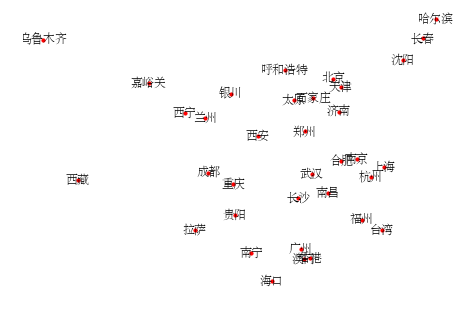

In [72]:
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [73]:
threshold = 700

In [74]:
from collections import defaultdict

In [75]:
cities_connection = defaultdict(list)

In [76]:
for c1 in cities: #城市两两之间的路径
    for c2 in cities:
        if c1 == c2: continue
        
        if get_city_distance(c1, c2) < threshold: 
            cities_connection[c1].append(c2)

In [77]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [85]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '海口', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '海口',
              '太原',
              '西安',
              '北京',
              '天津'

In [78]:
cities_connection_graph = nx.Graph(cities_connection)

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


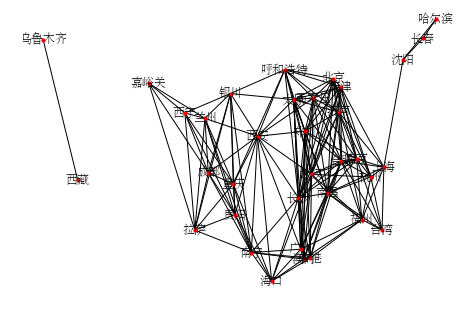

In [79]:
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [80]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [92]:
def search(graph, start, is_goal, search_strategy): #广度优先搜索
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = graph[froniter]
        
        for city in successors: 
            if city in path: continue
            
            new_path = path+[city]
            
            pathes.append(new_path)
        
            if is_goal(new_path): return new_path
#        print('len(pathes)={}'.format(pathes))
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [87]:
search(cities_connection, start='西安', is_goal=is_goal('上海'), search_strategy=lambda n: n)

['西安', '石家庄', '济南', '上海']

In [88]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [89]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=lambda n: n)

['北京', '长沙', '南宁', '拉萨']

In [91]:
search(cities_connection, start='北京', is_goal=is_goal('拉萨'), search_strategy=sort_path(lambda n: n))

['北京', '南京', '上海', '南昌', '台湾', '合肥', '天津', '呼和浩特', '太原', '广州', '南宁', '拉萨']

# Machine Learning, the first step

In [1]:
from sklearn.datasets import load_boston

In [2]:
dataset = load_boston()

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape

(506, 13)

In [5]:
y.shape

(506,)

In [6]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [7]:
X[:, 0].shape

(506,)

In [8]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

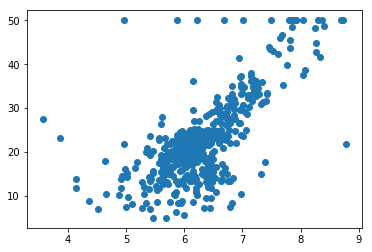

In [11]:
plt.scatter(X[:, 5], y)

In [12]:
room_num = X[:, 5]

In [14]:
price = y

In [15]:
import random

In [16]:
import numpy as np

In [17]:
def func(age, k, b): return k * age + b

In [18]:
def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))
    # return np.mean(np.square(y - yhat))
    # return np.mean(np.sqrt(y - yhat))

In [19]:
min_error_rate = float('inf')

In [20]:
loop_times = 10000

In [21]:
losses = []

loop == 10000
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 63.51569999984709
loop == 9999
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 59.46603706157863
loop == 9998
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 55.416374123310185
loop == 9997
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 51.366711185041744
loop == 9996
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 47.3170482467733
loop == 9995
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 43.26738530850485
loop == 9994
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 39.2177223702364
loop == 9993
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 35.168059431967954
loop == 9992
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 31.11839649369951
loop == 9991
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 9826
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.5270418502608765
loop == 9825
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.526831968089949
loop == 9824
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.526622416626544
loop == 9823
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.526408250136225
loop == 9822
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.526202982992211
loop == 9821
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.525984532182498
loop == 9820
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.525783549357878
loop == 9819
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.525560814228774
loop == 9818
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.525364115723546
loop == 9817
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 9668
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.493751069261269
loop == 9667
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.4935394795493355
loop == 9666
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.493327351307543
loop == 9665
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.493120045915003
loop == 9664
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.492903633353818
loop == 9663
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.492700612280671
loop == 9662
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.492479915400094
loop == 9661
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.492281178646338
loop == 9660
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.492057153030799
loop == 9659
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 9530
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.464725020639201
loop == 9529
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.464511254483344
loop == 9528
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.464300201395031
loop == 9527
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.464097483929204
loop == 9526
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.463880222684302
loop == 9525
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.463678872841625
loop == 9524
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.4634664521301595
loop == 9523
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.463254053597455
loop == 9522
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.463052681576018
loop == 9521
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 9377
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.432789696415729
loop == 9376
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.432572435170826
loop == 9375
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.432374540578533
loop == 9374
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.4321613805699105
loop == 9373
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.4319503069527935
loop == 9372
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.431750325968995
loop == 9371
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.431533064724092
loop == 9370
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.431332279971041
loop == 9369
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.431122010123176
loop == 9368
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 9257
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.40799253281256
loop == 9256
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.407795667931474
loop == 9255
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.40759268287271
loop == 9254
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.407385888496527
loop == 9253
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.4071790941203455
loop == 9252
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.406981772530045
loop == 9251
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.406779244180494
loop == 9250
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.406572449804313
loop == 9249
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.406365655428131
loop == 9248
f(age) = -7.3879640652340655 * age + 1.3980964028843

f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.372716716174304
loop == 9081
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.372515030676561
loop == 9080
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.372313345178818
loop == 9079
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.372111659681075
loop == 9078
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.371915942102953
loop == 9077
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.371718318761048
loop == 9076
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.371516633263306
loop == 9075
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.371314947765564
loop == 9074
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.371113262267821
loop == 9073
f(age) = -7.3879640652340655 * age + 1.398096402884386, with err

loop == 8930
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.342599287614762
loop == 8929
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.3423938642061914
loop == 8928
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.342224495929218
loop == 8927
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.341984160586388
loop == 8926
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.341849704243675
loop == 8925
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.341585310205683
loop == 8924
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.3413400663364925
loop == 8923
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.341193930864496
loop == 8922
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.340952744106819
loop == 8921
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 8768
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.312064285802824
loop == 8767
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.311892717642516
loop == 8766
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.311724519323891
loop == 8765
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.311529709935006
loop == 8764
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.31138948837684
loop == 8763
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.311315945003513
loop == 8762
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.310900511667936
loop == 8761
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.310952937296003
loop == 8760
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.310560745189004
loop == 8759
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 8582
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.280241477184872
loop == 8581
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.280075032061332
loop == 8580
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.279912737242051
loop == 8579
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.279742236990134
loop == 8578
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.279571736738215
loop == 8577
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.279401236486298
loop == 8576
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.2792400566965405
loop == 8575
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.279072496543477
loop == 8574
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.27890199629156
loop == 8573
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 8398
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.249421161166811
loop == 8397
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.2492506609148935
loop == 8396
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.2490801606629764
loop == 8395
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.24892420701101
loop == 8394
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.248754305857402
loop == 8393
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.248583805605484
loop == 8392
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.248413305353566
loop == 8391
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.248250040517236
loop == 8390
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.248087450547992
loop == 8389
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 8243
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.223825640199868
loop == 8242
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.223619577343962
loop == 8241
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.223407554457464
loop == 8240
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.22327365553453
loop == 8239
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.223107110846185
loop == 8238
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.22300515398781
loop == 8237
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.222795600210961
loop == 8236
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.222668105267381
loop == 8235
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.222430918871328
loop == 8234
f(age) = -7.3879640652340655 * age + 1.39809640288438

loop == 8084
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.198296055606508
loop == 8083
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.198083886807042
loop == 8082
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.197890237803923
loop == 8081
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.197760019018919
loop == 8080
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.1975807555049585
loop == 8079
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.197536787418631
loop == 8078
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.197385434503225
loop == 8077
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.197111834230061
loop == 8076
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.196974082319158
loop == 8075
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 7895
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.168673344704104
loop == 7894
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.168517107046508
loop == 7893
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.168360869388914
loop == 7892
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.168210844352242
loop == 7891
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.168063174224172
loop == 7890
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.167906936566576
loop == 7889
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.16775069890898
loop == 7888
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.167594461251386
loop == 7887
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.167443018432058
loop == 7886
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 7760
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.148075481824205
loop == 7759
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.148039048156859
loop == 7758
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.1478814128948365
loop == 7757
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.147629113792756
loop == 7756
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.14757516541576
loop == 7755
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.147435044863387
loop == 7754
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.147182745761308
loop == 7753
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.147113281336974
loop == 7752
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.146913094962201
loop == 7751
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 7586
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.122044494060285
loop == 7585
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.12199597934245
loop == 7584
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.121739339269553
loop == 7583
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.121714828457418
loop == 7582
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.1214341844788205
loop == 7581
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.121433677572386
loop == 7580
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.121133071897272
loop == 7579
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.121013283945709
loop == 7578
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.12096927430447
loop == 7577
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 7434
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.100280593270091
loop == 7433
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.100150237599169
loop == 7432
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.099984742652755
loop == 7431
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0998470892257375
loop == 7430
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.09973286062679
loop == 7429
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.099567365680376
loop == 7428
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.099415885184003
loop == 7427
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.099276768708856
loop == 7426
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.099150145358079
loop == 7425
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 7270
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.077717651470432
loop == 7269
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.077586578486556
loop == 7268
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.077455505502678
loop == 7267
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0773244325188
loop == 7266
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.077193359534923
loop == 7265
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.077062286551047
loop == 7264
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.076931213567169
loop == 7263
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.076803226610887
loop == 7262
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0766726121751775
loop == 7261
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 7105
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.056430053598369
loop == 7104
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.056304262388793
loop == 7103
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.056204697382967
loop == 7102
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.056062610476562
loop == 7101
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.055936014559458
loop == 7100
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.055820958564331
loop == 7099
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0556704116534865
loop == 7098
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.055542696659892
loop == 7097
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0554149816662965
loop == 7096
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 6980
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.040715959208772
loop == 6979
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.040576407418941
loop == 6978
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.040449632946212
loop == 6977
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.040322858473481
loop == 6976
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.040199777648367
loop == 6975
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.040082942515052
loop == 6974
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.039966533999035
loop == 6973
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.039826102876612
loop == 6972
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0396993284038825
loop == 6971
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 6835
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.022654022071377
loop == 6834
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.022534581767795
loop == 6833
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.022418140058367
loop == 6832
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0223062439637385
loop == 6831
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.022162199517518
loop == 6830
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.022036065039679
loop == 6829
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.021928871290693
loop == 6828
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.02180772723562
loop == 6827
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.021670376963659
loop == 6826
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 6691
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.00509010200553
loop == 6690
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.004901884975787
loop == 6689
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.004767176239622
loop == 6688
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.004735045334211
loop == 6687
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.004584026341952
loop == 6686
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.004428689879004
loop == 6685
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0042670522223345
loop == 6684
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.0041402650623334
loop == 6683
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 5.00399952386434
loop == 6682
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 6532
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.9856930574561025
loop == 6531
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.985593001880963
loop == 6530
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.985689258754974
loop == 6529
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.985330593997448
loop == 6528
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.985233929403265
loop == 6527
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.985327193603588
loop == 6526
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.984969430869893
loop == 6525
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.984880404906423
loop == 6524
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.9848170680470485
loop == 6523
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 6338
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.962653541155747
loop == 6337
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.96257377909732
loop == 6336
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.96241598433736
loop == 6335
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.9623035340304975
loop == 6334
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.9621837670593205
loop == 6333
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.962076308066179
loop == 6332
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.961951549781282
loop == 6331
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.961849082101862
loop == 6330
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.961721688247483
loop == 6329
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 6173
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.943842589806566
loop == 6172
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.94373389814981
loop == 6171
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.943620736901506
loop == 6170
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.943500391364827
loop == 6169
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.943398883996446
loop == 6168
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.943276094669554
loop == 6167
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.9431678210016745
loop == 6166
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.943054241764494
loop == 6165
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.942934314216692
loop == 6164
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 6047
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929896851179156
loop == 6046
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929762521183138
loop == 6045
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929649464337616
loop == 6044
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929546923048728
loop == 6043
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929440564143894
loop == 6042
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929327507298371
loop == 6041
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929214450452851
loop == 6040
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.9291116625189595
loop == 6039
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.929005550259127
loop == 6038
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 5893
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.91368508032846
loop == 5892
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913582332948795
loop == 5891
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913479731703389
loop == 5890
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913480969392651
loop == 5889
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913335747201991
loop == 5888
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913181314762412
loop == 5887
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913161331621791
loop == 5886
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.913037330261012
loop == 5885
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.912882897821435
loop == 5884
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 5785
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902751624616103
loop == 5784
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902691400782587
loop == 5783
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.90261699396182
loop == 5782
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902462561522241
loop == 5781
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902360568335977
loop == 5780
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902327930867959
loop == 5779
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902173498428379
loop == 5778
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.902036146087456
loop == 5777
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.901977234207723
loop == 5776
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 5664
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.890634759022289
loop == 5663
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.890534410880231
loop == 5662
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.89043715186891
loop == 5661
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.890341263864968
loop == 5660
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.890240915722909
loop == 5659
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8901405675808505
loop == 5658
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.890040219438792
loop == 5657
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.889939871296735
loop == 5656
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.889839523154677
loop == 5655
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 5530
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8777569125545535
loop == 5529
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877649164542969
loop == 5528
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877590822507061
loop == 5527
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877435801012059
loop == 5526
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877442446792778
loop == 5525
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877327216398957
loop == 5524
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877174265961106
loop == 5523
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.877113852868048
loop == 5522
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8770081759136135
loop == 5521
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 5376
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.863593583696985
loop == 5375
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.863502776623638
loop == 5374
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8634115374886395
loop == 5373
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.863322478960027
loop == 5372
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8632294912802925
loop == 5371
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.863142181296417
loop == 5370
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.863047445071949
loop == 5369
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.862961883632807
loop == 5368
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.862865398863601
loop == 5367
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 5211
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848671559723394
loop == 5210
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848585126222254
loop == 5209
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848478637281245
loop == 5208
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848372148340237
loop == 5207
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848313343320234
loop == 5206
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848222750364953
loop == 5205
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.848116261423943
loop == 5204
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8480102641132845
loop == 5203
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.847934215215599
loop == 5202
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 5050
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.834131275677797
loop == 5049
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8340394097856185
loop == 5048
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.833950946028842
loop == 5047
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.833859362106385
loop == 5046
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.833770616379887
loop == 5045
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.833679314427152
loop == 5044
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.833590286730931
loop == 5043
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.83349926674792
loop == 5042
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.833409957081975
loop == 5041
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 4883
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8192197417870775
loop == 4882
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.81912622834363
loop == 4881
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.819017194860449
loop == 4880
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.818928302033409
loop == 4879
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.818835582483283
loop == 4878
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.818758489301879
loop == 4877
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.818696751366351
loop == 4876
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.818586049202049
loop == 4875
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.818511609187126
loop == 4874
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 4726
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.805474465136827
loop == 4725
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.805316956333833
loop == 4724
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.805242328830214
loop == 4723
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.805211885438552
loop == 4722
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.805095281322832
loop == 4721
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8050071146641296
loop == 4720
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.80494823381545
loop == 4719
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.8048023438897065
loop == 4718
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.804801186308069
loop == 4717
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 4547
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7901566921437935
loop == 4546
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.790067464141092
loop == 4545
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.789979665260169
loop == 4544
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.789906473065619
loop == 4543
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.789817245062916
loop == 4542
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.789728017060213
loop == 4541
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.78964488406065
loop == 4540
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.78956702598474
loop == 4539
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.789477797982037
loop == 4538
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 4340
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.773805401082791
loop == 4339
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.773710779776445
loop == 4338
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.77366795139659
loop == 4337
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.773625168100055
loop == 4336
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.773543744226548
loop == 4335
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7735589732446435
loop == 4334
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.773336585532634
loop == 4333
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7732726288750085
loop == 4332
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.773196151065606
loop == 4331
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 4150
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.760236662241155
loop == 4149
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.760181359183915
loop == 4148
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.760085314477313
loop == 4147
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.760017114763847
loop == 4146
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.759973410561456
loop == 4145
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.759877365854852
loop == 4144
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.759799139594966
loop == 4143
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.759726228721793
loop == 4142
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.759678587034544
loop == 4141
f(age) = -7.3879640652340655 * age + 1.398096402884

f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747842761869181
loop == 3973
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747768489134394
loop == 3972
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747708335458052
loop == 3971
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747629001473378
loop == 3970
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747562259574879
loop == 3969
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747494575062248
loop == 3968
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747415241077575
loop == 3967
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.747356030015364
loop == 3966
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7472808146664445
loop == 3965
f(age) = -7.3879640652340655 * age + 1.398096402884386, with er

loop == 3786
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734622605155286
loop == 3785
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734557293749384
loop == 3784
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734511281967141
loop == 3783
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7344319479824675
loop == 3782
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734352613997793
loop == 3781
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734273280013119
loop == 3780
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734205226931828
loop == 3779
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.734161956824973
loop == 3778
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7340826228403
loop == 3777
f(age) = -7.3879640652340655 * age + 1.3980964028843

loop == 3590
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7210022262961875
loop == 3589
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7209393401093696
loop == 3588
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.720867751943363
loop == 3587
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.720799007592848
loop == 3586
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.720733277590537
loop == 3585
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7206586750763275
loop == 3584
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.720598803237712
loop == 3583
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7205183425598065
loop == 3582
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.72046663934903
loop == 3581
f(age) = -7.3879640652340655 * age + 1.398096402

loop == 3373
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.706132063996751
loop == 3372
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.706050022799028
loop == 3371
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.7059939602651335
loop == 3370
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.705915548446203
loop == 3369
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.705853627748612
loop == 3368
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.705781074093378
loop == 3367
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.705713295232091
loop == 3366
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.705646599740552
loop == 3365
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.70557296271557
loop == 3364
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 3193
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6937880959452745
loop == 3192
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693710466703796
loop == 3191
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693647763428754
loop == 3190
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.69357599235097
loop == 3189
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693507430912233
loop == 3188
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693441517998145
loop == 3187
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693367098395712
loop == 3186
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693307043645319
loop == 3185
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.693226765879191
loop == 3184
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 3004
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.68094587337005
loop == 3003
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6809041058316145
loop == 3002
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680837381583739
loop == 3001
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680755340386017
loop == 3000
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680673299188294
loop == 2999
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680640530034462
loop == 2998
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680564807401983
loop == 2997
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680482766204261
loop == 2996
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.680405013246931
loop == 2995
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 2836
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6696437375647655
loop == 2835
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669583056267835
loop == 2834
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669506813978239
loop == 2833
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669452835282506
loop == 2832
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669374170200642
loop == 2831
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669318576461574
loop == 2830
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669317601280488
loop == 2829
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.669260386826523
loop == 2828
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.66911234917313
loop == 2827
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 2647
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6571731381980666
loop == 2646
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6570995461153135
loop == 2645
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.65703817824147
loop == 2644
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.656972705823323
loop == 2643
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.656899562349174
loop == 2642
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.656845865531332
loop == 2641
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.656772273448579
loop == 2640
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.656707698247641
loop == 2639
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.656645433156588
loop == 2638
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 2470
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6458018185810515
loop == 2469
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.645736849385704
loop == 2468
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.645674814881107
loop == 2467
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6456181005644455
loop == 2466
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6455531313690965
loop == 2465
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.64548816217375
loop == 2464
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.645423192978403
loop == 2463
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.645376310866262
loop == 2462
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.645341547697707
loop == 2461
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 2302
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635674954012088
loop == 2301
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635618696141711
loop == 2300
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635562438271332
loop == 2299
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635508801696836
loop == 2298
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635458377551746
loop == 2297
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635402119681368
loop == 2296
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635345861810992
loop == 2295
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635289603940614
loop == 2294
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.635233346070235
loop == 2293
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 2107
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6251925020044355
loop == 2106
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.625121165978183
loop == 2105
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.625051019080941
loop == 2104
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.625035994023458
loop == 2103
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.624953440863355
loop == 2102
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.624906917362824
loop == 2101
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.62486826890863
loop == 2100
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.624785715748527
loop == 2099
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.624762815644705
loop == 2098
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 1905
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.614542411550124
loop == 1904
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.614502668152625
loop == 1903
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6144832396798785
loop == 1902
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.61445430522866
loop == 1901
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.614318137436327
loop == 1900
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6143147023236
loop == 1899
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.61424639749753
loop == 1898
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.614266339399636
loop == 1897
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.61409386332253
loop == 1896
f(age) = -7.3879640652340655 * age + 1.398096402884386,

loop == 1711
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604673061238978
loop == 1710
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604561708189453
loop == 1709
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604534412895159
loop == 1708
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604503724692164
loop == 1707
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604411315722105
loop == 1706
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6044217781979215
loop == 1705
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604312262531421
loop == 1704
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.604281587163231
loop == 1703
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.6042524416511075
loop == 1702
f(age) = -7.3879640652340655 * age + 1.3980964028

loop == 1577
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.59803374190151
loop == 1576
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597987959246047
loop == 1575
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597936350268793
loop == 1574
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597908030365743
loop == 1573
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597866566036107
loop == 1572
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597814957058853
loop == 1571
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5977633480816005
loop == 1570
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597711739104347
loop == 1569
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.597662346157374
loop == 1568
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 1408
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.590597648092597
loop == 1407
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.59055957587006
loop == 1406
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.590515011814614
loop == 1405
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.59047044775917
loop == 1404
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.590425883703723
loop == 1403
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.590381319648278
loop == 1402
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.590341167696872
loop == 1401
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.59030233707161
loop == 1400
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.590257773016164
loop == 1399
f(age) = -7.3879640652340655 * age + 1.398096402884386

loop == 1212
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.582219807761279
loop == 1211
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.582177505790274
loop == 1210
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.582142758151067
loop == 1209
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5820981940956225
loop == 1208
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.582053630040177
loop == 1207
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.582009065984731
loop == 1206
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.581964501929286
loop == 1205
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.581921271970031
loop == 1204
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.581887452319076
loop == 1203
f(age) = -7.3879640652340655 * age + 1.39809640288

loop == 1018
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.574030696359173
loop == 1017
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.574032668067454
loop == 1016
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573949896256844
loop == 1015
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573952406317543
loop == 1014
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573869096154514
loop == 1013
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573872144567632
loop == 1012
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573788296052185
loop == 1011
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573791882817724
loop == 1010
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.573707495949855
loop == 1009
f(age) = -7.3879640652340655 * age + 1.398096402884

loop == 861
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.56781510237328
loop == 860
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.567775957983819
loop == 859
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.567736813594358
loop == 858
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.567697669204897
loop == 857
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.567663957871431
loop == 856
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5676526381849305
loop == 855
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.567607206355519
loop == 854
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.567629170325723
loop == 853
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5675215355239756
loop == 852
f(age) = -7.3879640652340655 * age + 1.398096402884386, with

loop == 703
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561728006306806
loop == 702
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561734813593074
loop == 701
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561661985848746
loop == 700
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561644392144529
loop == 699
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561595965390686
loop == 698
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561553970695982
loop == 697
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561529944932625
loop == 696
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561463549247436
loop == 695
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.561463924474564
loop == 694
f(age) = -7.3879640652340655 * age + 1.398096402884386, with 

loop == 551
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555896165804089
loop == 550
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5558851623055725
loop == 549
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555815623236345
loop == 548
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555776538385388
loop == 547
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555737453534428
loop == 546
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555704371505842
loop == 545
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555685941145057
loop == 544
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555638351047781
loop == 543
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.555595519696512
loop == 542
f(age) = -7.3879640652340655 * age + 1.398096402884386, with

loop == 372
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.549028465165214
loop == 371
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5489893803142545
loop == 370
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.548950295463297
loop == 369
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5489133331022575
loop == 368
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.548896792783597
loop == 367
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.548905639184214
loop == 366
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.548822405372954
loop == 365
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.548761582015579
loop == 364
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.548722497164619
loop == 363
f(age) = -7.3879640652340655 * age + 1.398096402884386, wit

loop == 199
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542806922252097
loop == 198
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542783533946055
loop == 197
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542739480924314
loop == 196
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.54272388119488
loop == 195
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542677710434127
loop == 194
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542658725230922
loop == 193
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542682396731843
loop == 192
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542590706144596
loop == 191
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.542558893812246
loop == 190
f(age) = -7.3879640652340655 * age + 1.398096402884386, with e

loop == 9
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536889841626614
loop == 8
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536843670865862
loop == 7
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536832415402905
loop == 6
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536787710600119
loop == 5
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536761827212963
loop == 4
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536731750334375
loop == 3
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.536691239023021
loop == 2
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.53667579006863
loop == 1
f(age) = -7.3879640652340655 * age + 1.398096402884386, with error rate: 4.5366296193078774


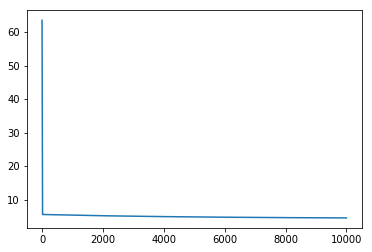

In [23]:
change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat

best_direction = None

def step(): return random.random() * 1

direction = random.choice(change_directions)

def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

learing_rate = 1e-1

while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(price, func(room_num, k_hat, b_hat), room_num)
    b_delta = -1 * learing_rate * derivate_b(price, func(room_num, k_hat, b_hat))

    # k_delta_direction, b_delta_direction = direction
    #
    # k_delta = k_delta_direction * step()
    # b_delta = b_delta_direction * step()
    #
    # new_k = best_k + k_delta
    # new_b = best_b + b_delta

    k_hat += k_delta
    b_hat += b_delta

    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y=price, yhat=estimated_price)

    # if error_rate < min_error_rate:
    #     min_error_rate = error_rate
    #     best_k, best_b = new_k, new_b
        # best_k, best_b = k_hat, b_hat

        # direction = (k_delta_direction, b_delta_direction)

        # print(min_error_rate)
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    # else:
    #     direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))

    losses.append(error_rate)

    loop_times -= 1


# plt.scatter(sub_age, sub_fare)
# plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')
# plt.plot(sub_age, func(sub_age, k_hat, b_hat), c='r')
# plt.show()

plt.plot(range(len(losses)), losses)
plt.show()